In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [75]:
dataset=pd.read_csv(r"C:\Users\HP\Downloads\Glassdoor Project\glassdoor_jobs.csv")

In [76]:
dataset.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [78]:
dataset.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [79]:
dataset.shape

(956, 15)

In [80]:
dataset.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [81]:
# CHek Unique Columns 
dataset.nunique()

Unnamed: 0           956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Founded'}>, <Axes: >]], dtype=object)

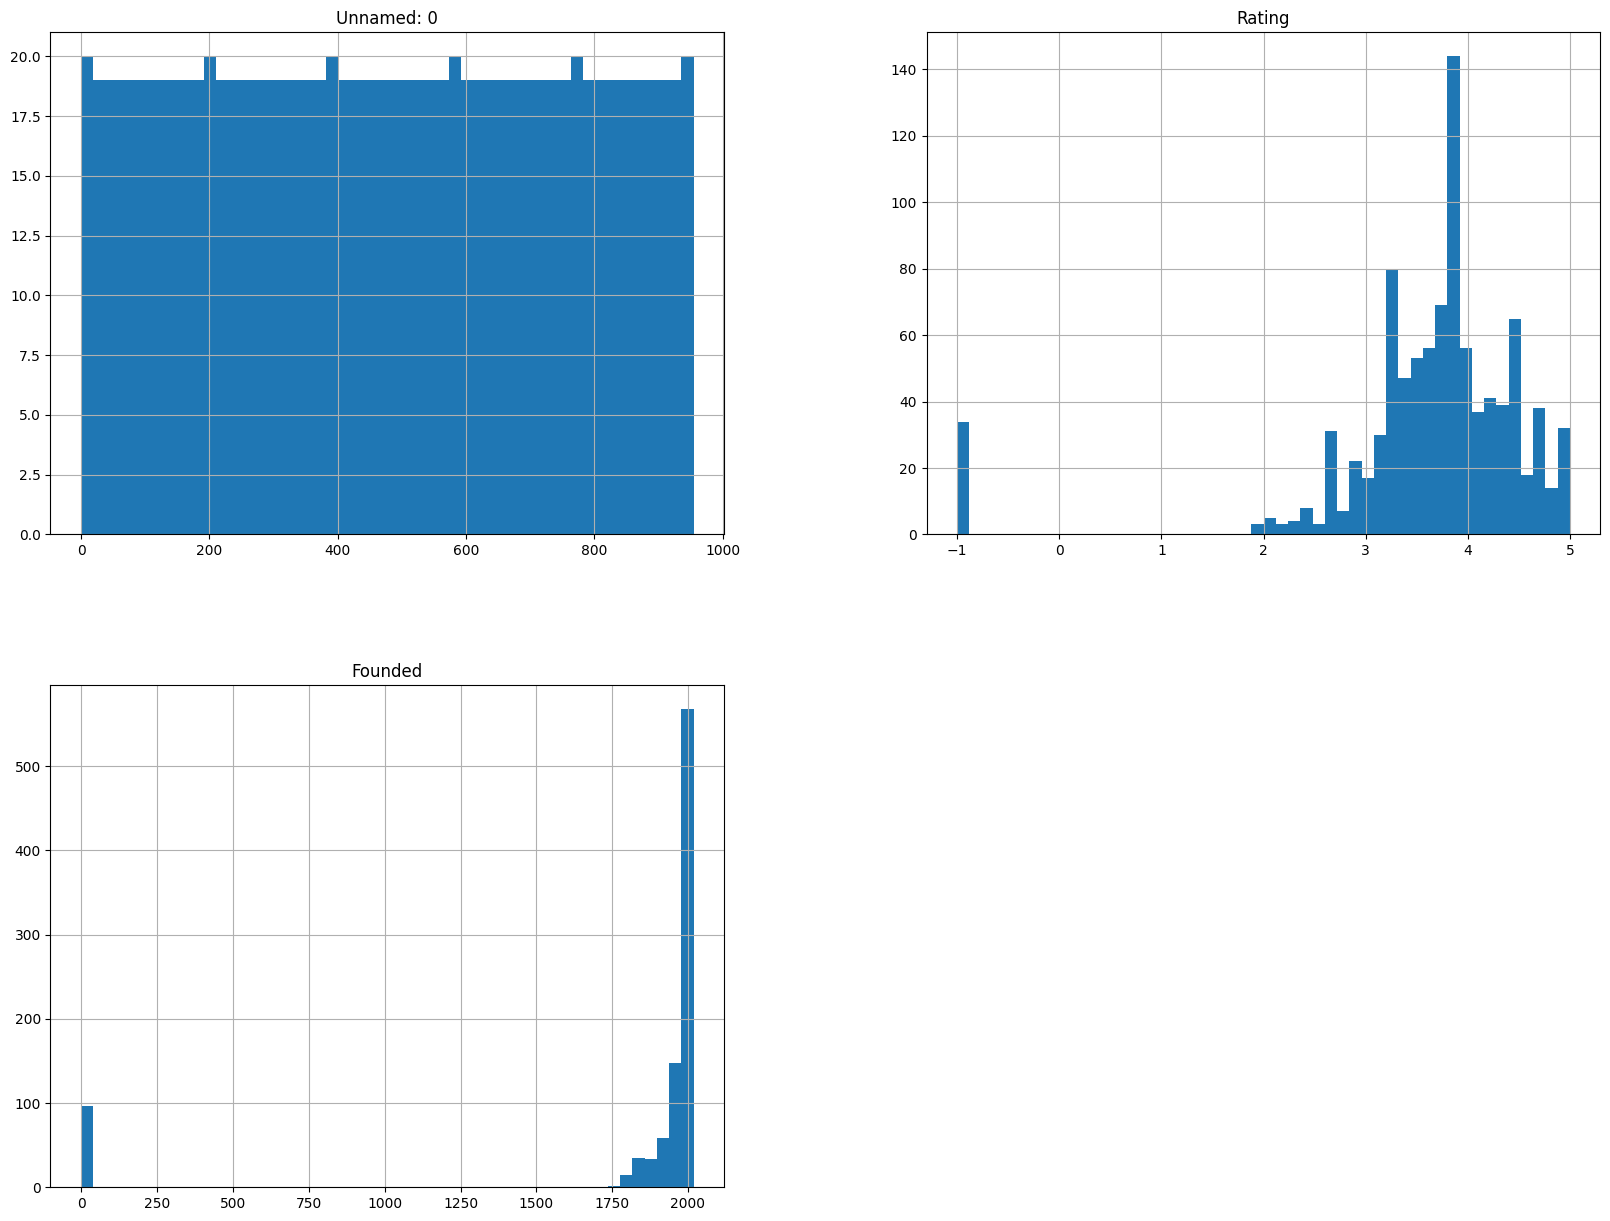

In [82]:
# Badha Graph avi jay 1k sathe 
dataset.hist(bins=50,figsize=(20,15))

In [83]:
#Clean Salary Column

In [84]:
# Keep only rows that have a salary estimate
dataset = dataset[dataset['Salary Estimate'] != '-1']
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck"
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1


In [85]:
# Remove symbols and text   :- Extra Words remove karya salary mathi 
dataset['Salary Estimate']=dataset['Salary Estimate'].str.replace(r'\$|K|Per Hour|Employer Provided Salary:', '', regex=True)
dataset['Salary Estimate'] = dataset['Salary Estimate'].str.replace(r'\(.*?\)', '', regex=True)
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck"
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1


In [86]:
#  Split into min and max :- Min and Max  ni 2e alg alg Colums banavi je thi easy pade 
dataset[['Min Salary', 'Max Salary']] = dataset['Salary Estimate'].str.split('-', expand=True)
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",58,111
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",72,133
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,56,91
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,95,160


In [87]:
print(dataset.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary'],
      dtype='object')


In [88]:
dataset['Min Salary'] = pd.to_numeric(dataset['Min Salary'], errors='coerce')
dataset['Max Salary'] = pd.to_numeric(dataset['Max Salary'], errors='coerce')
dataset.dropna(subset=['Min Salary', 'Max Salary'], inplace=True)
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",58,111
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",72,133
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,56,91
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,95,160


In [89]:
# Calculate average
dataset['Avg Salary'] = (dataset['Min Salary'] + dataset['Max Salary']) / 2
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",58,111,84.5
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",72,133,102.5
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,56,91,73.5
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,95,160,127.5


# Location and Company Info

In [90]:
# Job Description jo python,sql ect jevi language avti hoy to 1 avu joe and ana mate algthi apde column banavia che 

dataset['Python'] = dataset['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
dataset['Excel'] = dataset['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
dataset['SQL'] = dataset['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
dataset['AWS'] = dataset['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
dataset['R Studio'] = dataset['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

dataset


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,Min Salary,Max Salary,Avg Salary,Python,Excel,SQL,AWS,R Studio
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,$50 to $100 million (USD),-1,53,91,72.0,1,1,0,0,0
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,$2 to $5 billion (USD),-1,63,112,87.5,1,0,0,0,0
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,$100 to $500 million (USD),-1,80,90,85.0,1,1,1,0,0
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,1,0,0,0,0
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",58,111,84.5,0,0,0,1,0
951,951,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",72,133,102.5,1,0,1,1,0
952,952,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,Unknown / Non-Applicable,-1,56,91,73.5,0,1,0,0,0
953,953,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,$5 to $10 million (USD),-1,95,160,127.5,0,1,0,0,0


# Visualizations

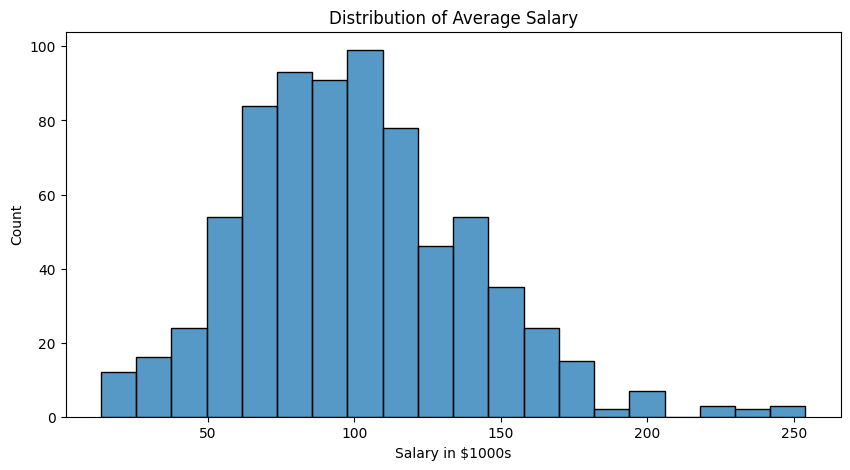

In [91]:
# AVG Salary me Distribution kari apde 
plt.figure(figsize=(10,5))
sns.histplot(dataset['Avg Salary'], bins=20)
plt.title("Distribution of Average Salary")
plt.xlabel("Salary in $1000s")
plt.ylabel("Count")
plt.show()

In [92]:
# pivot_data = dataset.pivot_table(values='Avg Salary', index='Job State', aggfunc='mean')
# pivot_data = pivot_data.sort_values(by='Avg Salary', ascending=False)

# # Plot
# pivot_data.plot(kind='bar', figsize=(12,6), legend=False)
# plt.title("Average Salary by State")
# plt.ylabel("Average Salary")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

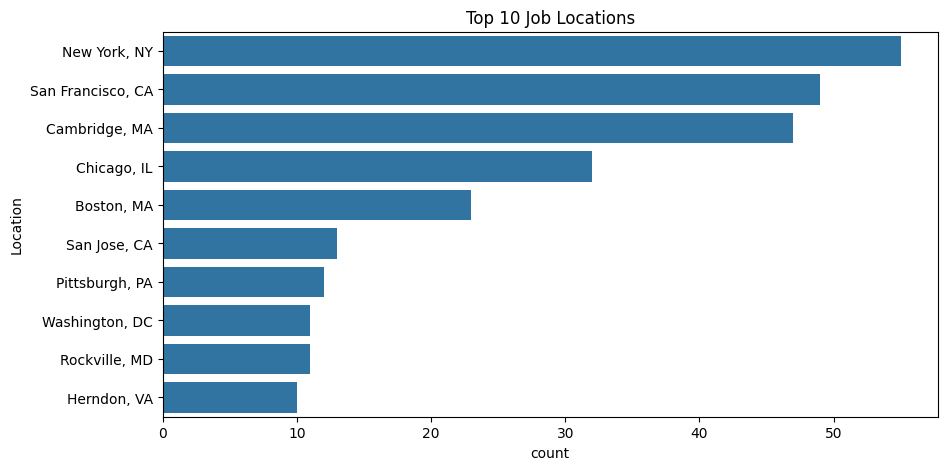

In [93]:
# 📍 Job Locations :- Top 10 Job Location pramane ape apdne Graph
plt.figure(figsize=(10,5))
sns.countplot(y='Location', data=dataset, order=dataset['Location'].value_counts().index[:10])
plt.title("Top 10 Job Locations")
plt.show()

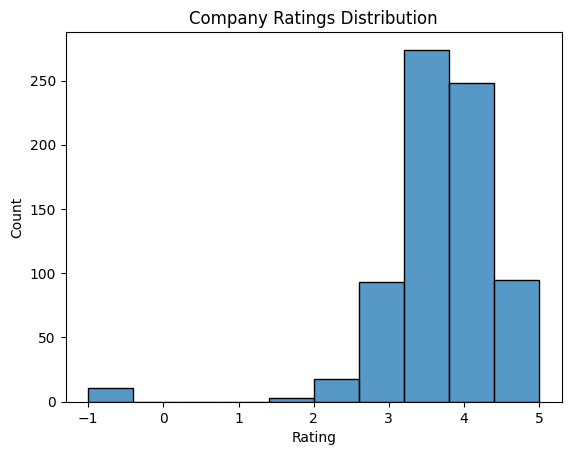

In [94]:
# ⭐ Company Ratings :- ky company nu su Ratings che a Pramane Graph apya che 
sns.histplot(dataset['Rating'], bins=10)
plt.title("Company Ratings Distribution")
plt.show()

In [95]:
dataset.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Python', 'Excel', 'SQL',
       'AWS', 'R Studio'],
      dtype='object')

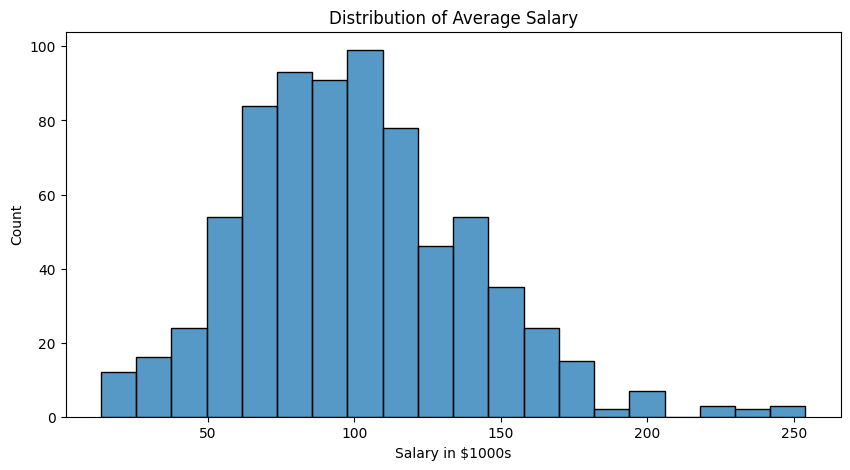

In [96]:
# Distribution AVG Salary
plt.figure(figsize=(10,5))
sns.histplot(dataset['Avg Salary'], bins=20)
plt.title("Distribution of Average Salary")
plt.xlabel("Salary in $1000s")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20452\4098527507.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_job.index, y=avg_salary_by_job.values, palette='viridis')


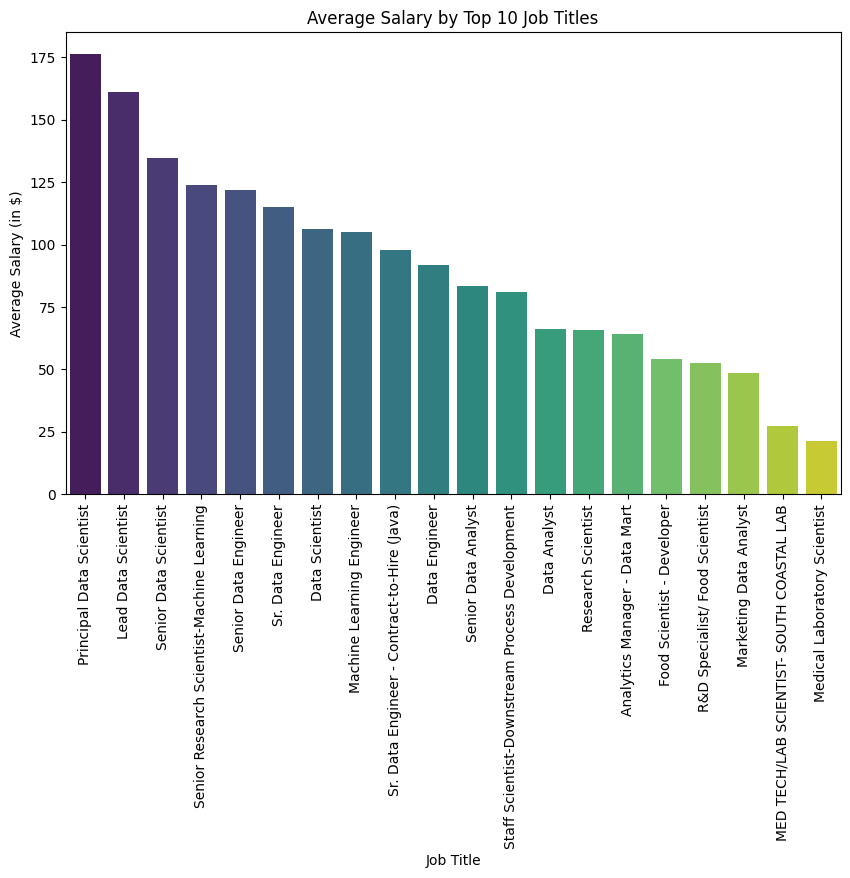

In [97]:
# Top job ne Avg Salary sathe Graph banvyo 
#Find Top 20 Job Title
top_jobs=dataset['Job Title'].value_counts().head(20).index
#Calculate Average Salary by Job Titl
avg_salary_by_job = dataset[dataset['Job Title'].isin(top_jobs)].groupby('Job Title')['Avg Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_job.index, y=avg_salary_by_job.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Average Salary (in $)')
plt.title('Average Salary by Top 10 Job Titles')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20452\2687969254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Size',y='Avg Salary',data=filtered_data,estimator=np.mean,palette='viridis')


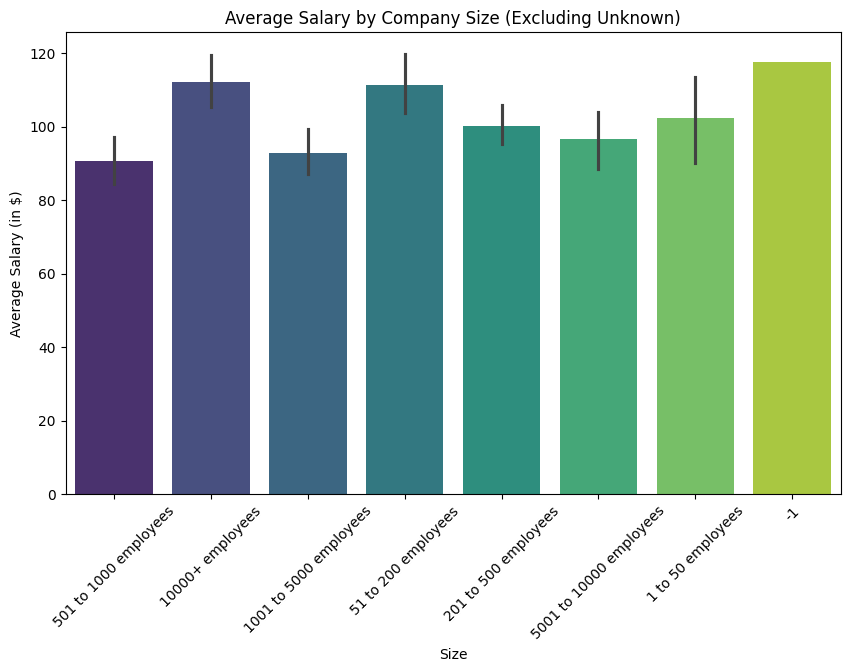

In [98]:
# Avg Salary by Compnay Sizes

filtered_data = dataset[dataset['Size'] != 'Unknown']

plt.figure(figsize=(10,6))
ax = sns.barplot(x='Size',y='Avg Salary',data=filtered_data,estimator=np.mean,palette='viridis')
plt.xticks(rotation=45)   # Bar niche je name lakhvi ne ave che ane rotaion mate use thay che 
plt.title('Average Salary by Company Size (Excluding Unknown)')
plt.ylabel('Average Salary (in $)')

plt.show()

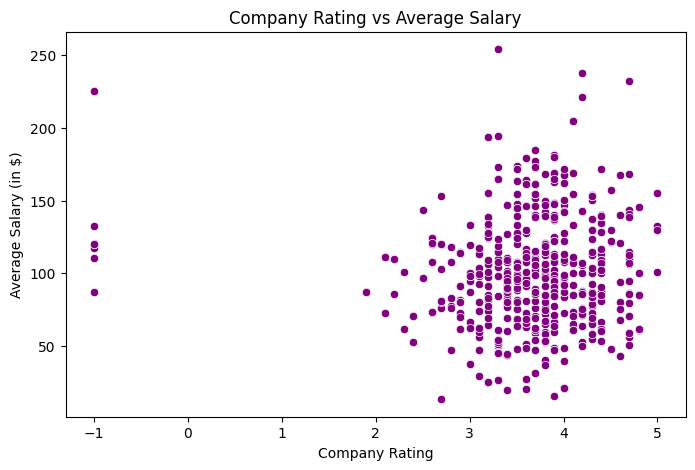

In [99]:
# Company Rating VS Avergae Salary 

plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Avg Salary', data=dataset, color='purple')
plt.title('Company Rating vs Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (in $)')
plt.show()

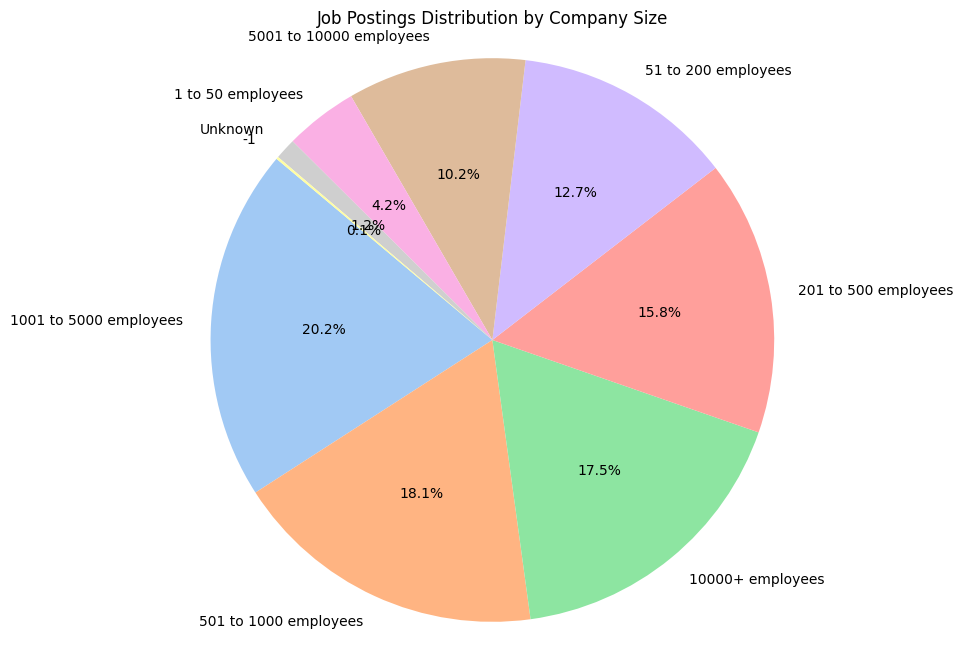

In [100]:
# Job Postings Distribution By Company size :-> Company size and Job Distribution pramane

size_counts = dataset['Size'].value_counts()

plt.figure(figsize=(8,8))  # Set chart size
plt.pie(size_counts,labels=size_counts.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette('pastel'))
plt.title('Job Postings Distribution by Company Size')  # Add chart heading
plt.axis('equal')  # Keep the pie chart circular
plt.show()  # Display the chart

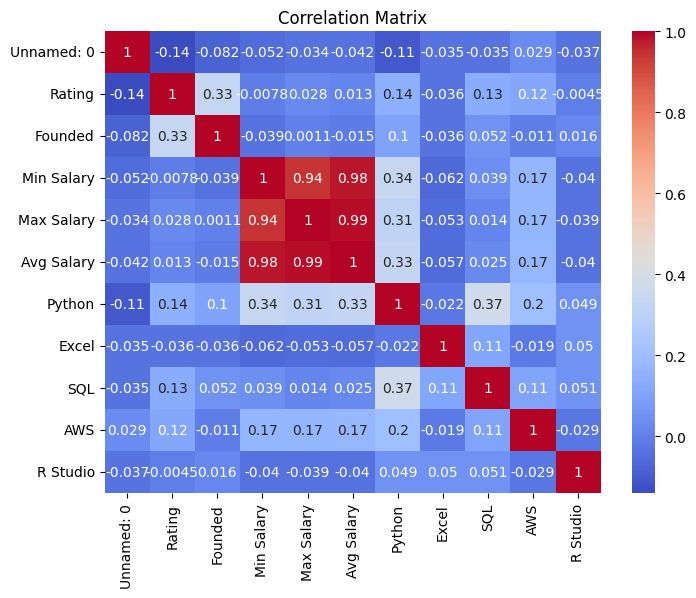

In [101]:
# Select only numeric columns :- ama only Numeric number ave a rite Graph banvyo che 
numeric_dataset = dataset.select_dtypes(include=['number'])

# Step 2: Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show() 

In [102]:
# # Top jobs and Avg salary Graph

# # Top 10 job titles :- Top 10 job ky che a batave che and anu algthi veriyebal banavyo che je thi easy pade 
# top_jobs = dataset['Job Title'].value_counts().head(10).index

# # Calculate average salary for each job title :- A Top 10 ni Salary AVG nikadi jethi 
# average_salary = top_job_data.groupby('Job Title')['Avg Salary'].mean()

# # Plot as horizontal bar chart
# average_salary.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
# plt.title("Top Job Titles and Their Average Salary")
# plt.xlabel("Average Salary ($1000s)")
# plt.ylabel("Job Title")
# plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20452\1571449428.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Avg Salary', data=dataset, ci=None)


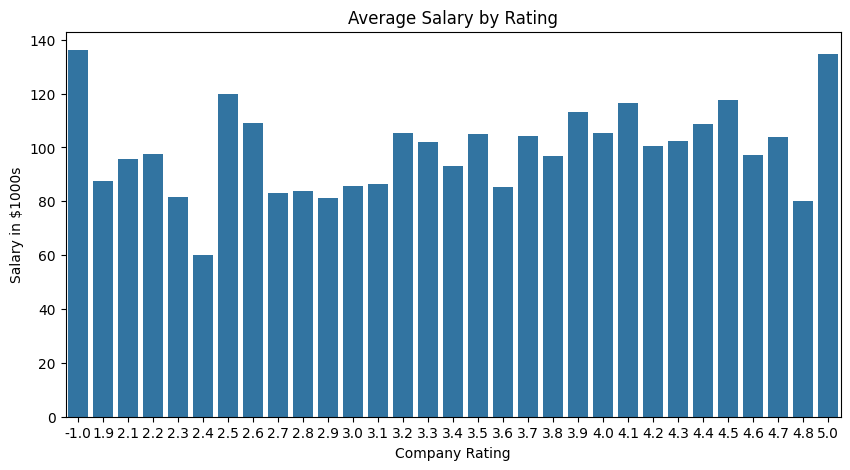

In [103]:
# Rating & Salary 

plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Avg Salary', data=dataset, ci=None)
plt.title("Average Salary by Rating")
plt.xlabel("Company Rating")
plt.ylabel("Salary in $1000s")
plt.show()

# Hypothsis Testing 

In [104]:
#  Hypothesis Testing ek statistical technique che je thi tame koi assumption (guess) verify karo cho using data.
#  -> Null Hypothesis (H₀): Default belief — “There is no effect or no difference.
#  -> Alternative Hypothesis (H₁): Opposite claim — “There is a significant effect or difference.



#  H₀(Null hypothesis): Job title distribution is independent of company size.
#  H₁(Alternative hypothesis): Job title distribution is related to company size.

In [105]:
from scipy.stats import chi2_contingency

# Step 1: Banne columns ni frequency table banavo
contingency_table = pd.crosstab(dataset['Job Title'], dataset['Size'])

# Step 2: Chi-Square test apply karo
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Step 3: P-value print karo to check significance
print("Chi-Square Test P-Value:", p_val)

Chi-Square Test P-Value: 1.042210367741167e-102


# Feature Engineering & Data Pre-processing

In [106]:
# Objective :-> To detect and handle extreme salary values that could distort the analysis and predictions.
# Detection Techinque :-> Here, Boxplot is used to visually inspect the distribution of Average Salary variable and identify outliers.

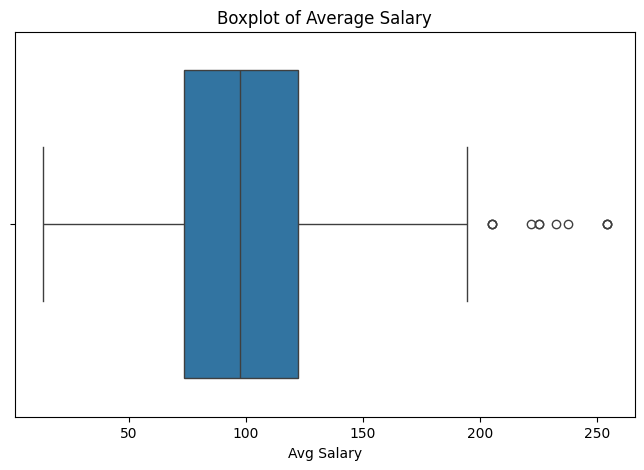

In [107]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['Avg Salary'])  # Corrected column name!
plt.title('Boxplot of Average Salary')
plt.show()

In [108]:
# Find Q1 and Q
Q1 = dataset['Avg Salary'].quantile(0.25)
Q3 = dataset['Avg Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(np.float64(0.0), np.float64(196.0))

In [109]:
# Handling Technique :- For removing outliers here winsorization technique is used to preserve data size.

dataset['Average Salary'] = dataset['Avg Salary'].apply(lambda x:
    lower_bound if x < lower_bound                             # If salary is too low → set to lower_bound
    else upper_bound if x > upper_bound                        # If salary is too high → set to upper_bound
    else x)                                                    # If salary is normal → keep it as is

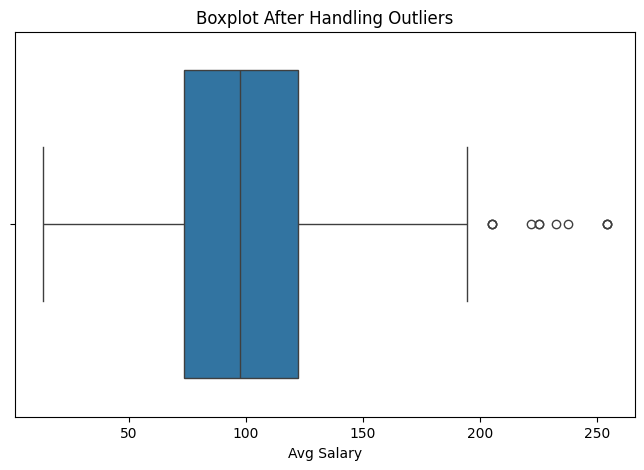

In [110]:
#Checking boxplot again
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['Avg Salary'])
plt.title('Boxplot After Handling Outliers')
plt.show()

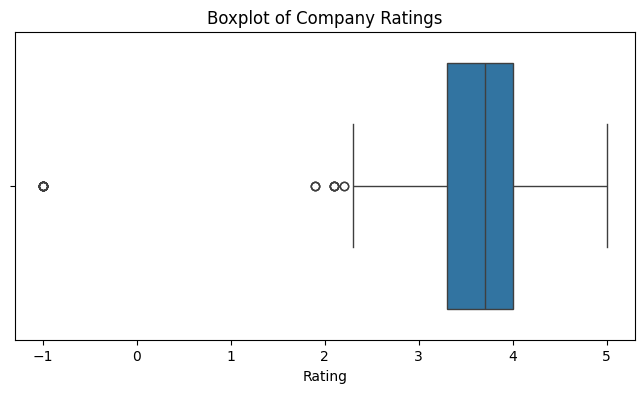

In [111]:
# A boxplot was used to visually inspect the distribution of the Rating variable and identify outliers.

plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['Rating'])
plt.title('Boxplot of Company Ratings')
plt.show()

In [112]:
# Boxplot flagged values below 2.0 as mild outliers, though this is acceptable in rating scales

# Check IQR values
Q1 = dataset['Rating'].quantile(0.25)
Q3 = dataset['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 2.2499999999999996, Upper Bound: 5.050000000000001


In [113]:
# Count outliers
outliers = dataset[(dataset['Rating'] < lower_bound) | (dataset['Rating'] > upper_bound)]
print(f"Number of outliers in Rating: {outliers.shape[0]}")

Number of outliers in Rating: 21


##Handling Technique:

In [114]:
# For removing outliers here winsorization technique is used to preserve data size.
dataset['Rating'] = dataset['Rating'].clip(lower=lower_bound, upper=upper_bound)

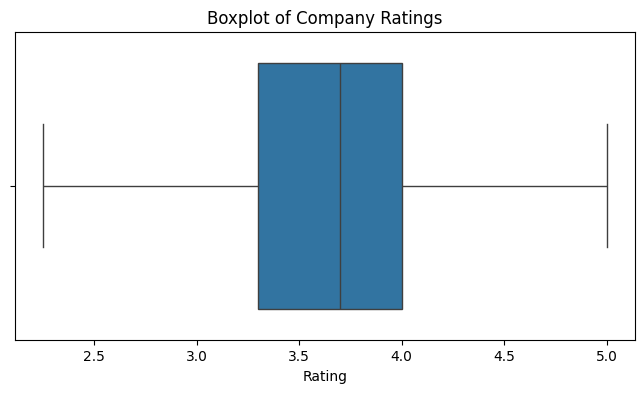

In [115]:
# Checking outlayar 
# Boxplot for Rating
plt.figure(figsize=(8, 4))
sns.boxplot(x=dataset['Rating'])
plt.title('Boxplot of Company Ratings')
plt.show()

### Drop High-Cardinality Columns

In [116]:
# A karvu atle jaruri che kem ML model Train karti vakhte Nois na ave , Encoding karvu pade    

# List of columns to drop based on high cardinality or redundancy
cols_to_drop = ['Unnamed: 0', 'Job Description', 'Company Name', 'Headquarters']

# Drop the columns
dataset.drop(columns=cols_to_drop, inplace=True)

# Drop the redundant 'Salary Estimate' column
dataset.drop('Salary Estimate', axis=1, inplace=True)

# Check the updated shape and remaining columns
print("Remaining columns:", dataset.columns.tolist())
print("Updated dataset shape:", dataset.shape)

Remaining columns: ['Job Title', 'Rating', 'Location', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Min Salary', 'Max Salary', 'Avg Salary', 'Python', 'Excel', 'SQL', 'AWS', 'R Studio', 'Average Salary']
Updated dataset shape: (742, 19)


### Categorical Encoding

In [117]:
# Top 20 Job Titles Only
top_jobs=dataset['Job Title'].value_counts().head(20).index
dataset['Job Title'] = dataset['Job Title'].apply(lambda x: x if x in top_jobs else 'Other')

In [118]:
# Top 20 Locations Only
top_locations = dataset['Location'].value_counts().head(20).index
dataset['Location'] = dataset['Location'].apply(lambda x: x if x in top_locations else 'Other')

In [119]:
# For remaining categorical columns with manageable cardinality use one hot encoding to convert them into numerical dummy variables.

# - **Top-N Encoding:**
  
#   - Applied to Job Title and Location (high-cardinality).
#   - Keeps top 20 frequent categories, groups others as 'Other' to reduce dimensionality.

# - **One-Hot Encoding:**

#    - Applied to Industry, Sector, Revenue, Type of ownership, Size.
#    - Suitable for low/moderate-cardinality, preserves category independence.

# **Why not Label Encoding?**
# It imposes an artificial order, which is inappropriate for nominal categories.

### Feature manipulation and Selection

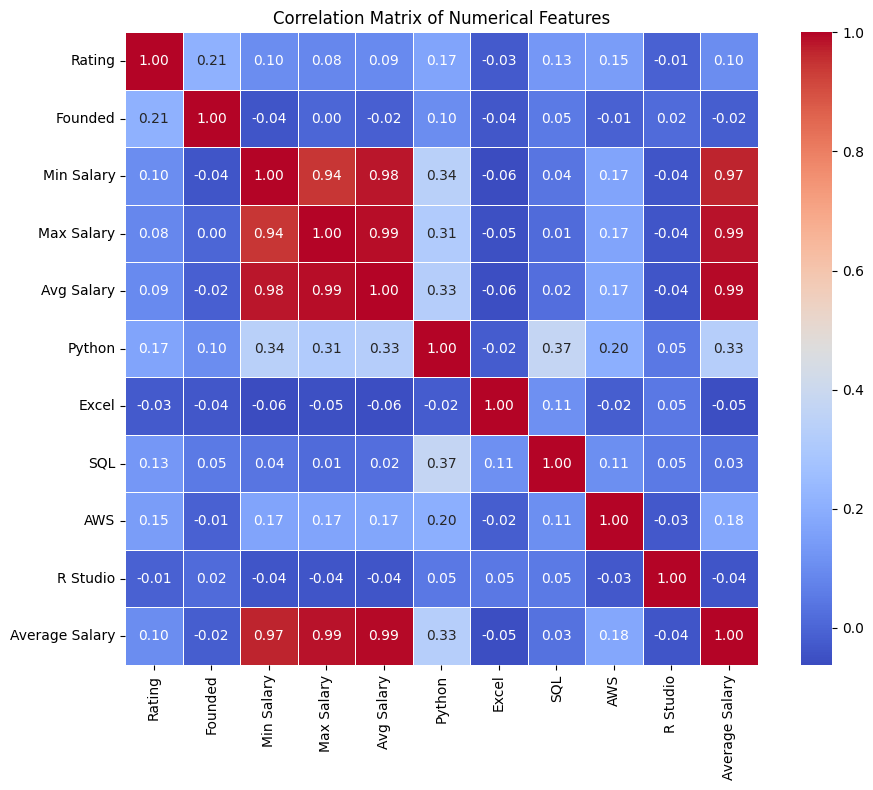

In [120]:
# To check the strength and direction of relationships between numerical features and with the target variable (Average Salary)


# Step 1: Select only numerical columns
numerical_cols = dataset.select_dtypes(include=['number']).columns
# Step 2: Correlation Matrix Plot
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [121]:
# Chi-Square Test (for Categorical vs Target)
# To check if there's a significant association between categorical variables and a binned version of Average Salary (as Chi-Square needs categorical data).

In [122]:
from scipy.stats import chi2_contingency
import pandas as pd

# Step 1: Salary ને 4 groups (Low to High) માં વિભાજિત કરો
dataset['Salary_Group'] = pd.qcut(dataset['Avg Salary'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Step 2: Categorical columns શોધો
cat_cols = dataset.select_dtypes(include='object').columns

# Step 3: Chi-square test run કરો
for col in cat_cols:
    table = pd.crosstab(dataset[col], dataset['Salary_Group'])  # contingency table
    _, p, _, _ = chi2_contingency(table)
    print(f"{col} vs Salary_Group → p-value: {p:.4f}")


Job Title vs Salary_Group → p-value: 0.0000
Location vs Salary_Group → p-value: 0.0000
Size vs Salary_Group → p-value: 0.0000
Type of ownership vs Salary_Group → p-value: 0.0000
Industry vs Salary_Group → p-value: 0.0000
Sector vs Salary_Group → p-value: 0.0000
Revenue vs Salary_Group → p-value: 0.0000
Competitors vs Salary_Group → p-value: 0.0000


### 5. Data Transformation

In [123]:
# Qestion :-  # Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

# ANS :-  Yes, partial transformation was necessary.

# Standard Scaling (`StandardScaler`) was applied **only to the numerical features** (`Rating`, `Founded`, `Average Salary`) before using **Linear Regression**.

# - **Linear Regression is sensitive to feature scales** — large differences in feature magnitudes can distort coefficient interpretations and affect model performance.

# - **StandardScaler standardizes features to have a mean of 0 and a standard deviation of 1**, ensuring all numerical variables contribute equally to the model.

# **Note:** Tree-based models like **Decision Tree** and **Random Forest** do **not require scaling** as they split data based on threshold values and are scale-invariant.

In [124]:
from sklearn.preprocessing import StandardScaler 

In [125]:
# 1. List numerical columns to scale
num_cols = ['Rating', 'Founded', 'Avg Salary']

# 2. Initialize scaler
scaler = StandardScaler()

# 3. Copy data to keep original safe
data_scaled = dataset.copy()

# 4. Apply scaling
data_scaled[num_cols] = scaler.fit_transform(data_scaled[num_cols])

In [126]:
# Since **Linear Regression is sensitive to feature scales**, we applied **Standard Scaling** to the numerical columns
#  to bring them to a common scale with mean 0 and standard deviation 1.

# We did **not apply scaling to Decision Tree and Random Forest models** as they are **scale-invariant** and handle raw data effectively.


# ML Model 

In [127]:
from sklearn.model_selection import train_test_split      # For splitting data
from sklearn.linear_model import LinearRegression         # The ML model
from sklearn.preprocessing import LabelEncoder            # For converting text to numbers
from sklearn.metrics import mean_squared_error, r2_score  # For checking performance

In [128]:
# Step 1: Encode categorical columns
data_encoded = pd.get_dummies(dataset, drop_first=True)

In [129]:
# Step 2: Define X and y
X = data_encoded.drop('Avg Salary', axis=1)  # 👈 Make sure column name is correct
y = data_encoded['Avg Salary']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Step 4: Check shapes
print(X_train.shape, X_test.shape)

(593, 294) (149, 294)


# 6. Handling Imbalanced Dataset

In [131]:
# checking class distribution in your target variable
dataset['Salary_Group'].value_counts()

Salary_Group
Low         190
High        185
Mid-Low     184
Mid-High    183
Name: count, dtype: int64

## ***7. ML Model Implementation***

In [132]:
# Linear Regression is a fundamental, interpretable machine learning algorithm used to model the relationship between a dependent variable and one
    #or more independent variables by fitting a linear equation to the observed data.
# It’s useful as a baseline model for regression problems due to its simplicity and ease of interpretation.

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [134]:
# Separate final features and target
x = data_encoded.drop('Avg Salary', axis=1)
y = data_encoded['Avg Salary']

In [135]:
# Split data into train and test sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [136]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [137]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

In [138]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr

7.041049324495221e-14

### Model Performance Evaluation

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [140]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr

7.041049324495221e-14

In [141]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

1.3390855628073268e-26

In [142]:
rmse_lr = np.sqrt(mse_lr)
rmse_lr

np.float64(1.1571886461624684e-13)

In [143]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_lr 

1.0

# Cross Validation and Hyperparameter Tuning

In [145]:
 # Since Linear Regression doesn’t have hyperparameters like tree-based models, we'll perform K-Fold Cross Validation to evaluate           
         #its generalization ability.

#Cross Validation maa apde data ne multiple parts (folds) maa vadhiye, ane badha folds par model alag-alag train-test kariye.

#Example: 5-Fold CV
# Data ne 5 parts maa vadho
# 1 part test, baki 4 train — repeat 5 vaar, jemaa har vaar navo part test mate use thay.

In [144]:
from sklearn.model_selection import cross_val_score

In [150]:
# 5-Fold Cross Validation (R² score)
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

print("R² Scores:", scores)
print("Average R²:", np.mean(scores))

R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0


# ML Model - Decision Trees


In [151]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

# Display metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

NameError: name 'y_pred_dt' is not defined